In [1]:
import numpy as np
import pathlib as plib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from lenslessclass.models import MultiClassLogistic, SLMMultiClassLogistic
from lenslessclass.datasets import MNISTAugmented
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from waveprop.devices import slm_dict, sensor_dict
import torchvision.datasets as dset


models = {
    "original": plib.Path("../CelebA_original_40epoch_seed0_BinaryLogistic_02052022_22h27"),
    "lens": plib.Path("../celeba_lens_outdim2352_height0.27_speckle40.0_croppsf100_202599files_50epoch_seed0_BinaryLogistic_03052022_23h28"),
}

original : 0.027941757738590242
lens : 0.11266186214983465


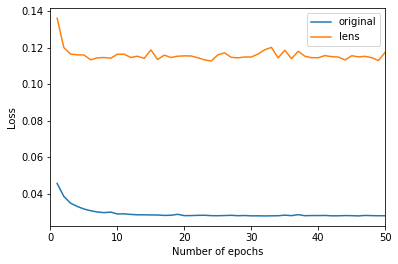

In [2]:
# load and plot error plots
for m in models.keys():
    test_loss = np.load(str(models[m] / "test_loss.npy"))
    n_epoch = np.arange(len(test_loss)) + 1
    print(f"{m} : {np.min(test_loss)}")
    plt.plot(n_epoch,  test_loss, label=m)
plt.legend()
plt.ylabel("Loss")
plt.xlim([0, 50])
plt.xlabel("Number of epochs");

original : 0.9151036739349365
lens : 0.9163376092910767


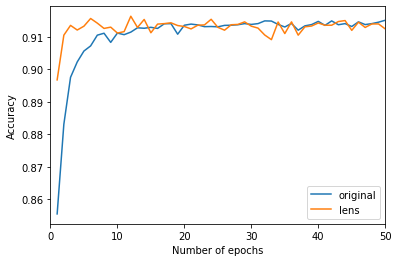

In [3]:
for m in models.keys():
    test_acc = np.load(str(models[m] / "test_acc.npy"))
    n_epoch = np.arange(len(test_acc)) + 1
    print(f"{m} : {np.max(test_acc)}")
    plt.plot(n_epoch,  test_acc, label=m)
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.xlim([0, 50]);